## Step 1: Importing and Loading the Dataset

PyTorch Geometric provides built-in datasets through the TUDataset class, which automatically downloads and processes graph datasets.

Enzymes dataset:

- Each graph in ENZYMES represents an enzyme and belongs to one of six classes.
- 600 graphs
- Nodes → Represent atoms in the protein.
- Edges → Represent bonds between atoms.
- Node Features → Each node (atom) has 3 features, chemical properties, structural information and bonding information which describe its properties.
- Graph Labels → Each graph belongs to one of 6 enzyme classes.

In [2]:
from torch_geometric.datasets import TUDataset

# Load the ENZYMES dataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES')

# Print dataset summary
print(dataset)


Processing...


ENZYMES(600)


Done!


- TUDataset: A dataset class for common graph datasets used in research.
- root='/tmp/ENZYMES': The directory where the dataset will be stored.
name='ENZYMES': Specifies which dataset to download.
- dataset contains 600 graphs, each representing an enzyme, classified into 6 categories.

## Step 2: Exploring Dataset Properties

In [3]:
# Number of graphs in the dataset
print(f"Total graphs: {len(dataset)}")

# Number of classes
print(f"Number of classes: {dataset.num_classes}")

# Number of node features
print(f"Number of node features: {dataset.num_node_features}")


Total graphs: 600
Number of classes: 6
Number of node features: 3


#### Explanation
- len(dataset): Returns the total number of graphs (600).
- dataset.num_classes: Shows the number of unique categories (6).
- dataset.num_node_features: Displays how many features each node has (3).

## Step 3: Accessing a Single Graph and Understanding its structure

Each graph in the dataset has nodes, edges, and labels. We can inspect an individual graph.

In [10]:
import torch

# Access the first graph in the dataset
data = dataset[0]

# Print basic information
print(data)

# Print the keys available in the graph data
print(f"Available keys: {data.keys()}")

# Display the number of nodes and edges
print(f"Number of nodes: {data.num_nodes}")
print(f"Number of edges: {data.num_edges}")

# Check if there are any isolated nodes (nodes with no connections)
print(f"Has isolated nodes? {data.has_isolated_nodes()}")

# Check if the graph is undirected
print(f"Is the graph undirected? {data.is_undirected()}")

print( data.y[0].item())


Data(edge_index=[2, 168], x=[37, 3], y=[1])
Available keys: ['y', 'edge_index', 'x']
Number of nodes: 37
Number of edges: 168
Has isolated nodes? False
Is the graph undirected? True
5


#### Explanation:

- dataset[0]: Retrieves the first graph.
- data.edge_index: Represents the connectivity between nodes.
- data.x: Contains node features.
- data.y: Represents the graph label (classification).
- data.keys(): Lists all attributes stored in the graph (e.g., x, edge_index, y).
- data.num_nodes: Returns the number of nodes.
- data.num_edges: Returns the total edges.
- data.has_isolated_nodes(): Checks for unconnected nodes.
- data.is_undirected(): Checks whether the graph's edges are bidirectional.

## Step 4: Splitting the Dataset

Since the ENZYMES dataset contains multiple graphs, we need to split it into training and testing subsets.

In [4]:
# 90% Training, 10% Testing
train_dataset = dataset[:540]  # First 540 graphs
test_dataset = dataset[540:]   # Remaining 60 graphs

# Print sizes
print(f"Training Set Size: {len(train_dataset)}")
print(f"Testing Set Size: {len(test_dataset)}")


Training Set Size: 540
Testing Set Size: 60


#### Explanation

- dataset[:540]: Selects the first 540 graphs for training.
- dataset[540:]: Selects the remaining 60 graphs for testing.


## Step 5: Shuffling the Dataset

To ensure a randomized split, we can shuffle before splitting.

In [5]:
# Shuffle the dataset to ensure randomness
dataset = dataset.shuffle()

# Re-split after shuffling
train_dataset = dataset[:540]
test_dataset = dataset[540:]

### Alternatively: Manual Shuffle

In [6]:
import torch

# Generate a random permutation of indices
perm = torch.randperm(len(dataset))

# Apply permutation to dataset
dataset = dataset[perm]


#### Explanation
- .shuffle(): Randomizes the dataset order.
- torch.randperm(len(dataset)): Creates a shuffled index list.
- dataset[perm]: Reorders dataset according to shuffled indices.


## Step 6: Visualize a sample graph from the dataset

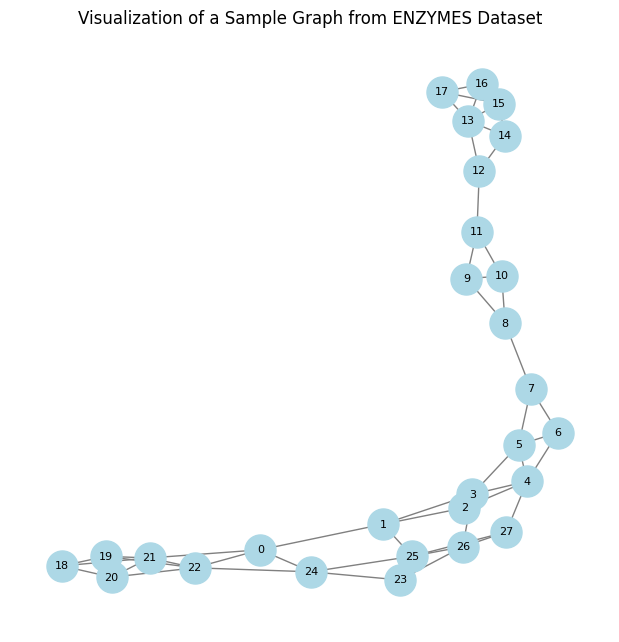

In [7]:
import networkx as nx #used for graph visualization
import matplotlib.pyplot as plt #used for plotting
from torch_geometric.utils import to_networkx #converts pytorch graph to networkx graph

# Select a sample graph (e.g., first graph in the dataset)
sample_graph = dataset[0]

# Convert the PyG graph to a NetworkX graph for visualization
G = to_networkx(sample_graph, to_undirected=True)  # Ensure undirected visualization

# Plot the graph
plt.figure(figsize=(6, 6)) #set figure size
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray', node_size=500, font_size=8)
plt.title("Visualization of a Sample Graph from ENZYMES Dataset")
plt.show()


G = to_networkx(sample_graph, to_undirected=True):
- to_networkx() converts the PyTorch Geometric graph into a NetworkX graph.
- to_undirected=True ensures the graph is undirected (so edges appear both ways).

nx.draw(G, with_labels=True, ...) → Draws the graph.
- with_labels=True → Displays node numbers.
- node_color='lightblue' → Nodes are light blue.
- edge_color='gray' → Edges are gray.
- node_size=500 → Adjusts node size.
- font_size=8 → Sets label font size.



## Step 7: Prepare Data for Training

In [14]:
import torch 
import torch.nn.functional as F #provides activation functions, loss functions, etc
from torch_geometric.datasets import TUDataset 
from torch_geometric.loader import DataLoader #helps in mini batching
from torch_geometric.nn import GCNConv, global_mean_pool #GCN layer and pooling method for graph level representation

# Reload and shuffle dataset
dataset = TUDataset(root='/tmp/ENZYMES', name='ENZYMES').shuffle()

# Split into train and test
train_dataset = dataset[:540]
test_dataset = dataset[540:] 

# Create DataLoaders for batch processing
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

#### What is a DataLoader?
A `DataLoader` is used in PyTorch to efficiently load **mini-batches** of data during training. It helps by:
- **Handling large datasets** in small chunks (batches)  
- **Shuffling data** for better training generalization  
- **Automatically batching graphs** (since PyG handles variable-sized graphs)  

#### Train Dataset
- train_dataset: Contains 540 training graphs.
- batch_size=32: The model processes 32 graphs at a time instead of all at once.
- shuffle=True: Randomizes the order of graphs in each epoch to improve learning.

#### Train Dataset
- test_dataset: Contains 60 testing graphs.
- batch_size=32: Evaluates 32 graphs at a time (batching speeds up inference).
- shuffle=False: Keeps the test dataset order fixed for consistent evaluation.






#### What is Mini-Batching?
Mini-batching is a training strategy where instead of **feeding the entire dataset at once**, the model processes the data in **smaller chunks (batches)**.

#### Why Use Mini-Batching?
- **Faster Training**  → Instead of updating after processing the whole dataset, the model updates its weights **multiple times per epoch**.
- **Efficient Memory Usage** → Large datasets don’t fit in memory, so mini-batches allow processing in smaller parts.
- **Better Generalization** → Training with shuffled mini-batches **reduces overfitting** compared to using the entire dataset at once.


## Step 8: Define the GNN Model 

The goal of the model is to classify each protein into one of six enzyme classes based on its molecular structure.

In [21]:
import torch.nn as nn
from torch_geometric.nn import GCNConv, global_mean_pool

class GNN(nn.Module): #define a new GNN model
    def __init__(self, num_node_features, hidden_dim, num_classes):
        super(GNN, self).__init__()
        self.conv1 = GCNConv(num_node_features, hidden_dim)  # First GCN layer
        self.conv2 = GCNConv(hidden_dim, hidden_dim)  # Second GCN layer
        self.fc = nn.Linear(hidden_dim, num_classes)  # Fully connected layer for classification

    def forward(self, data):
        x, edge_index, batch = data.x, data.edge_index, data.batch
        x = F.relu(self.conv1(x, edge_index))  # First GCN + ReLU activation
        print(x.shape)
        x = F.relu(self.conv2(x, edge_index))  # Second GCN + ReLU

        x = global_mean_pool(x, batch)  # Aggregate node embeddings to graph-level representation
        print(x.shape)
        x = self.fc(x)  # Final classification layer
        return F.log_softmax(x, dim=1)  # Softmax for multi-class classification


#### Explanation 

1. class GNN(nn.Module): Defines a new Graph Neural Network (GNN) model that inherits from PyTorch's nn.Module.

2. def __init__(self, num_node_features, hidden_dim, num_classes): Defines the model structure – we specify how many features, hidden layers, and output classes the model will have.

3. super(GNN, self).__init__() - Ensures PyTorch can track the model (this is required for custom models).

4. self.conv1 = GCNConv(num_node_features, hidden_dim) - First GCN layer: It helps nodes learn information from their neighbors.

5. self.conv2 = GCNConv(hidden_dim, hidden_dim) - Second GCN layer: It further refines the learned node relationships.

6. self.fc = nn.Linear(hidden_dim, num_classes) - Final layer: Converts the graph's information into a classification output (which class the graph belongs to).

hidden_dim - number of features each node will have after passing through the GCN layers. It controls how much information each node can learn during training.





#### **Understanding the Forward Pass in a Graph Neural Network (GNN)**

#### What is the Forward Pass?
The **forward pass** defines **how data flows through the model**.  
It takes an input **graph**, processes it through the GNN layers, and **outputs a prediction**.

# **Breakdown of the `forward()` Function in the GNN Model**

| Code | Explanation |
|------|------------|
| `def forward(self, data):` | Defines the **forward pass**, which processes input graph data and outputs predictions. |
| `x, edge_index, batch = data.x, data.edge_index, data.batch` | Extracts **node features (`x`)**, **graph connectivity (`edge_index`)**, and **batch information** for mini-batching. |
| `x = F.relu(self.conv1(x, edge_index))` | **First GCN layer**: Updates each node’s features by aggregating information from its neighbors. Uses **ReLU activation** for non-linearity. |
| `x = F.relu(self.conv2(x, edge_index))` | **Second GCN layer**: Further refines the learned node embeddings, allowing each node to learn from **2-hop neighbors**. |
| `x = global_mean_pool(x, batch)` | **Graph pooling**: Aggregates all node features within a graph to create a **single graph representation** (since we classify graphs, not nodes). |
| `x = self.fc(x)` | **Fully connected layer**: Maps the graph representation to an output vector corresponding to the number of classes. |
| `return F.log_softmax(x, dim=1)` | **Log-Softmax Activation**: Converts the raw scores into **probabilities for multi-class classification**. |


## Step 9: Training the Model

In [22]:
# Define the model, optimizer, and loss function
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") #checks if a GPU is available bc it is faster 
model = GNN(num_node_features=dataset.num_node_features, hidden_dim=64, num_classes=dataset.num_classes).to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
criterion = nn.CrossEntropyLoss()

# Training loop
def train(): 
    model.train() # Set the model to training mode
    total_loss = 0 # Track the total loss
    for data in train_loader: # Loop through mini-batches
        data = data.to(device)  # Move the batch to GPU (if available)
        optimizer.zero_grad() # Reset gradients to zero before each update
        out = model(data) # Forward pass (generate predictions)
        loss = criterion(out, data.y)  # Compute loss (difference from true labels)
        loss.backward() # Backpropagation (calculate gradients)
        optimizer.step() # Update model weights based on gradients
        total_loss += loss.item() # Accumulate total loss
    return total_loss / len(train_loader) # Return average loss per batch

# Run training
for epoch in range(20): #20 training iterations 
    loss = train() # Calls the train() function
    print(f"Epoch {epoch+1}, Loss: {loss:.4f}") # Prints loss for monitoring


torch.Size([1071, 64])
torch.Size([32, 64])
torch.Size([1025, 64])
torch.Size([32, 64])
torch.Size([1001, 64])
torch.Size([32, 64])
torch.Size([1000, 64])
torch.Size([32, 64])
torch.Size([1021, 64])
torch.Size([32, 64])
torch.Size([914, 64])
torch.Size([32, 64])
torch.Size([1240, 64])
torch.Size([32, 64])
torch.Size([920, 64])
torch.Size([32, 64])
torch.Size([1111, 64])
torch.Size([32, 64])
torch.Size([933, 64])
torch.Size([32, 64])
torch.Size([1127, 64])
torch.Size([32, 64])
torch.Size([1103, 64])
torch.Size([32, 64])
torch.Size([1113, 64])
torch.Size([32, 64])
torch.Size([974, 64])
torch.Size([32, 64])
torch.Size([1043, 64])
torch.Size([32, 64])
torch.Size([950, 64])
torch.Size([32, 64])
torch.Size([1123, 64])
torch.Size([28, 64])
Epoch 1, Loss: 1.8003
torch.Size([960, 64])
torch.Size([32, 64])
torch.Size([1142, 64])
torch.Size([32, 64])
torch.Size([1003, 64])
torch.Size([32, 64])
torch.Size([1094, 64])
torch.Size([32, 64])
torch.Size([945, 64])
torch.Size([32, 64])
torch.Size([1012,

1. model = GNN(num_node_features=dataset.num_node_features, hidden_dim=64, num_classes=dataset.num_classes).to(device):

- num_node_features: Number of features per node (e.g., properties of atoms in molecules).
- hidden_dim=64: Size of the hidden layers.
- num_classes: Number of output classes (e.g., 6 classes in the ENZYMES dataset).

2. optimizer = torch.optim.Adam(model.parameters(), lr=0.01, weight_decay=5e-4)
- Adam Optimizer → A commonly used optimizer that adjusts learning rates for different parameters.
- lr=0.01 → Learning rate (determines how fast the model updates weights).
- weight_decay=5e-4 → L2 regularization (prevents overfitting by penalizing large weights).

3. criterion = nn.CrossEntropyLoss()
- Cross-Entropy Loss → Used for multi-class classification problems.
- It compares the model’s predictions (out) with the true labels (data.y) and computes the error.


gradient tells us how much each weight affects the loss 
"if i increase this weight will the loss go up or down?"

the fc layer has weights that map graph embeddings to class probabilities and decides how much influence each feature has on the final classification.

## Step 10: Evaluate the Model 

In [15]:
def test():
    model.eval()
    correct = 0 #keeps track of the number of correctly predicted graphs.
    total = 0 #Stores the total number of graphs tested.
    with torch.no_grad(): #no weight updates happen here (only evaluation)
        for data in test_loader: 
            data = data.to(device) #move batch to GPU if available 
            out = model(data) #forwards pass(iterates over mini batches and makes predictions)
            pred = out.argmax(dim=1) #selects the class with the highest probability
            correct += (pred == data.y).sum().item() #compare predictions to true labels
            total += data.y.size(0) #keeps track of num of graphs evaluated 
    return correct / total #classification accuracy 

# Compute test accuracy
test_acc = test()
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.3000


### How to improve accuracy?

1. Adding more training epochs – The model might need more time to learn.
2. Using a different optimizer – AdamW or SGD with momentum may help.
3. Tuning hidden_dim – A larger hidden_dim (e.g., 128 instead of 64) may improve performance.
4. Adding dropout – Helps prevent overfitting and improves generalization.
5. Batch normalization – Stabilizes learning and helps with better weight updates.
6. Using CrossEntropyLoss() directly – Instead of manually applying log_softmax.